## Business case : Yulu 
#### Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

#### Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

#### Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### The company wants to know:
<font color = 'red'> Which variables are significant in predicting the demand for shared electric cycles in the Indian market? How well those variables describe the electric cycle demands? </font>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [5]:
data = pd.read_csv('yulu_bike_sharing_dataset.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
data['season']= pd.Categorical(data['season'])
data['workingday']= pd.Categorical(data['workingday'])
data['weather']= pd.Categorical(data['weather'])

    
### $H_0$: The number of cycles rented is the same at all 4 seasons
### $H_a$: For at least one weather , number of cycles rented is different

**Now, let us go ahead and perform one way ANOVA with 'Season' with respect to 'count'.**

In [8]:
formula = 'count ~ C(season)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,2.190083e+07,7.300277e+06,236.946711,6.164843e-149
Residual,10882.0,3.352721e+08,3.080979e+04,NaN,NaN


**We see the corresponding p value is less than aplha (0.05). So, we reject the null hypothesis.**  

**Now, let us go ahead and perform one way ANOVA with 'weather' with respect to 'count'.**

    
### $H_0$: The number of cycles rented is the same at all 4 weather
### $H_a$: For at least one weather , number of cycles rented is different

In [10]:
formula = 'count ~ C(weather)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(weather),3.0,6.338070e+06,2.112690e+06,65.530241,5.482069e-42
Residual,10882.0,3.508348e+08,3.223992e+04,NaN,NaN


**We see the corresponding p value is less than aplha (0.05). So, we reject the null hypothesis.**  
**Which means, For atleast one weather, number of cycles rented is different.**

**Now, let us go ahead and perform one way ANOVA with 'workingday' with respect to 'count'.**

### $H_0$: The number of cycles rented is the same at workingday or weekday 
### $H_a$: For at least one day , number of cycles rented is different

In [30]:
formula = 'count ~ C(workingday)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(workingday),1.0,4.801037e+04,48010.372613,1.463199,0.226448
Residual,10884.0,3.571249e+08,32811.916878,NaN,NaN


**We see the corresponding p value is greater than aplha (0.05). Thus, we fail reject the null hypothesis.**  
**Which means, the number of cycles rented are the same at workingday or weekday.**

In [35]:
formula = 'count ~ C(season) + C(workingday)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,2.190083e+07,7.300277e+06,236.958680,6.067887e-149
C(workingday),1.0,4.774407e+04,4.774407e+04,1.549718,2.132039e-01
Residual,10881.0,3.352243e+08,3.080823e+04,NaN,NaN


**The p-value in the one of the treatments is greater than $\alpha$(0.05)**

**Let us check whether there is any interaction effect between the treatments.**

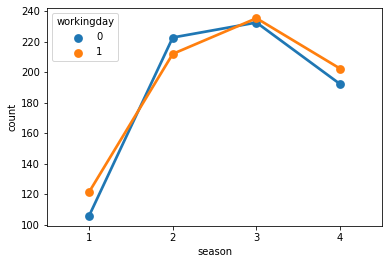

In [40]:
sns.pointplot(x='season', y='count', data=data, hue='workingday',ci=None);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

In [37]:
formula = 'count ~ C(season) + C(workingday) + C(season):C(workingday)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,2.190083e+07,7.300277e+06,237.054547,5.318316e-149
C(workingday),1.0,4.774407e+04,4.774407e+04,1.550345,2.131113e-01
C(season):C(workingday),3.0,2.279540e+05,7.598466e+04,2.467373,6.018585e-02
Residual,10878.0,3.349964e+08,3.079577e+04,NaN,NaN


**Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'season' and 'workingday' suggests that the Null Hypothesis is not rejected in this case.**